In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import xarray as xr

from scipy.interpolate import griddata

2023-09-15 10:52:12.867407: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

In [7]:
with open('../../../../in_situ_obs_ascat_with_customisations.pickle', 'rb') as handle: 
    ascat_dict = pickle.load(handle)    

In [4]:
ascat_lon = ascat_dict['Irminger_6']['lon'][0]
ascat_lat = ascat_dict['Irminger_6']['lat'][0]

## Example #1 Pioneer_8

In [5]:
ascat_dict['Pioneer_8']['nc_files']

{'ASCA_SZR_1B_M01_20180329145700Z_20180329163558Z_N_O_20180329160627Z': 'ASCATL1SZR_20180329T145700Z_20180329T163558Z_epct_4695022c_P.nc',
 'ASCA_SZR_1B_M02_20180329140000Z_20180329153858Z_N_O_20180329153840Z': 'ASCATL1SZR_20180329T140000Z_20180329T153858Z_epct_3e2792a6_P.nc',
 'ASCA_SZR_1B_M01_20180328234200Z_20180329012358Z_N_O_20180329005813Z': 'ASCATL1SZR_20180328T234200Z_20180329T012358Z_epct_37fd0cf9_P.nc',
 'ASCA_SZR_1B_M02_20180328004800Z_20180328022958Z_N_O_20180328022916Z': 'ASCATL1SZR_20180328T004800Z_20180328T022958Z_epct_e2f37719_P.nc',
 'ASCA_SZR_1B_M01_20180327135700Z_20180327153858Z_N_O_20180327150603Z': 'ASCATL1SZR_20180327T135700Z_20180327T153858Z_epct_24ff3439_P.nc',
 'ASCA_SZR_1B_M02_20180326150000Z_20180326164158Z_N_O_20180326163958Z': 'ASCATL1SZR_20180326T150000Z_20180326T164158Z_epct_b7d01466_P.nc',
 'ASCA_SZR_1B_M01_20180326004500Z_20180326022958Z_N_O_20180326015135Z': 'ASCATL1SZR_20180326T004500Z_20180326T022958Z_epct_ab0bb9e7_P.nc',
 'ASCA_SZR_1B_M02_201803252

In [10]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20200121T214800Z_20200121T232958Z_epct_f73691bd_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)

In [7]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20171031T235100Z_20171101T013258Z_epct_bdee10d6_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)
data_ascat.lat

<xarray.DataArray 'lat' (lat: 75)>
array([ 88.055269,  85.669408,  83.283546,  80.897685,  78.511824,  76.125963,
        73.740102,  71.35424 ,  68.968379,  66.582518,  64.196657,  61.810796,
        59.424934,  57.039073,  54.653212,  52.267351,  49.88149 ,  47.495628,
        45.109767,  42.723906,  40.338045,  37.952183,  35.566322,  33.180461,
        30.7946  ,  28.408739,  26.022877,  23.637016,  21.251155,  18.865294,
        16.479433,  14.093571,  11.70771 ,   9.321849,   6.935988,   4.550127,
         2.164265,  -0.221596,  -2.607457,  -4.993318,  -7.379179,  -9.765041,
       -12.150902, -14.536763, -16.922624, -19.308486, -21.694347, -24.080208,
       -26.466069, -28.85193 , -31.237792, -33.623653, -36.009514, -38.395375,
       -40.781236, -43.167098, -45.552959, -47.93882 , -50.324681, -52.710542,
       -55.096404, -57.482265, -59.868126, -62.253987, -64.639848, -67.02571 ,
       -69.411571, -71.797432, -74.183293, -76.569155, -78.955016, -81.340877,
       -83.726738, -86.112599, -88.498461])
Coordinates:
  * lat      (lat) float64 88.06 85.67 83.28 80.9 ... -81.34 -83.73 -86.11 -88.5
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [8]:
(data_ascat.lat[40] - data_ascat.lat[41])*111

<xarray.DataArray 'lat' ()>
array(264.8305941)

In [9]:
data_ascat.lat

<xarray.DataArray 'lat' (lat: 75)>
array([ 88.055269,  85.669408,  83.283546,  80.897685,  78.511824,  76.125963,
        73.740102,  71.35424 ,  68.968379,  66.582518,  64.196657,  61.810796,
        59.424934,  57.039073,  54.653212,  52.267351,  49.88149 ,  47.495628,
        45.109767,  42.723906,  40.338045,  37.952183,  35.566322,  33.180461,
        30.7946  ,  28.408739,  26.022877,  23.637016,  21.251155,  18.865294,
        16.479433,  14.093571,  11.70771 ,   9.321849,   6.935988,   4.550127,
         2.164265,  -0.221596,  -2.607457,  -4.993318,  -7.379179,  -9.765041,
       -12.150902, -14.536763, -16.922624, -19.308486, -21.694347, -24.080208,
       -26.466069, -28.85193 , -31.237792, -33.623653, -36.009514, -38.395375,
       -40.781236, -43.167098, -45.552959, -47.93882 , -50.324681, -52.710542,
       -55.096404, -57.482265, -59.868126, -62.253987, -64.639848, -67.02571 ,
       -69.411571, -71.797432, -74.183293, -76.569155, -78.955016, -81.340877,
       -83.726738, -86.112599, -88.498461])
Coordinates:
  * lat      (lat) float64 88.06 85.67 83.28 80.9 ... -81.34 -83.73 -86.11 -88.5
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [10]:
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 75, lon: 150)
Coordinates:
  * lat                  (lat) float64 88.06 85.67 83.28 ... -83.73 -86.11 -88.5
  * lon                  (lon) float64 -178.8 -176.4 -174.0 ... 174.3 176.7
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20171031T235100Z
    stop_sensing_time:         20171101T013258.125000Z
    EPCT_geospatial_lat_max:   79.1824
    EPCT_geospatial_lat_min:   68.8408
    EPCT_geospatial_lon_max:   199.7849
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [11]:
data_ascat['sigma0_trip_fore'].shape

(75, 150)

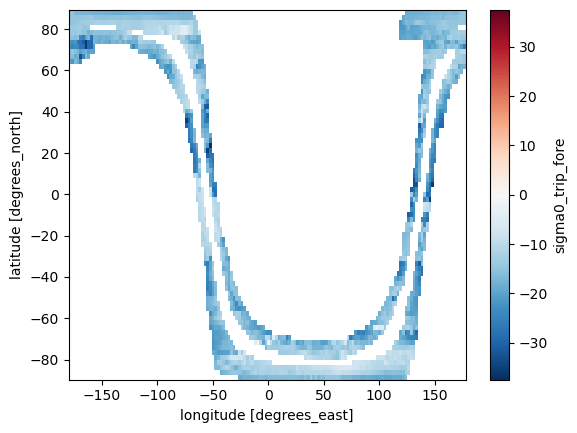

In [12]:
data_ascat['sigma0_trip_fore'].plot()

## -

In [287]:
ascat_dict['Irminger_6']['nc_files']

{'ASCA_SZR_1B_M03_20200121221800Z_20200122000258Z_N_O_20200122000039Z': 'ASCATL1SZR_20200121T221800Z_20200122T000258Z_epct_dde0d061_P.nc',
 'ASCA_SZR_1B_M02_20200121214800Z_20200121232958Z_N_O_20200121233009Z': 'ASCATL1SZR_20200121T214800Z_20200121T232958Z_epct_f73691bd_P.nc',
 'ASCA_SZR_1B_M03_20200121203900Z_20200121221758Z_N_O_20200121221909Z': 'ASCATL1SZR_20200121T203900Z_20200121T221758Z_epct_6d46d573_P.nc',
 'ASCA_SZR_1B_M02_20200121200600Z_20200121214758Z_N_O_20200121214723Z': 'ASCATL1SZR_20200121T200600Z_20200121T214758Z_epct_b91d267a_P.nc',
 'ASCA_SZR_1B_M03_20200121135700Z_20200121153258Z_N_O_20200121153548Z': 'ASCATL1SZR_20200121T135700Z_20200121T153258Z_epct_d0ee053f_P.nc',
 'ASCA_SZR_1B_M02_20200121132400Z_20200121150558Z_N_O_20200121150416Z': 'ASCATL1SZR_20200121T132400Z_20200121T150558Z_epct_885af20d_P.nc',
 'ASCA_SZR_1B_M03_20200121121500Z_20200121135658Z_N_O_20200121135527Z': 'ASCATL1SZR_20200121T121500Z_20200121T135658Z_epct_050510c3_P.nc',
 'ASCA_SZR_1B_M02_202001211

## Example #2 Irminger_6

In [288]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20200121T221800Z_20200122T000258Z_epct_dde0d061_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)
data_ascat.lat

<xarray.DataArray 'lat' (lat: 83)>
array([ 8.810465e+01,  8.595733e+01,  8.381001e+01,  8.166269e+01,
        7.951537e+01,  7.736805e+01,  7.522073e+01,  7.307341e+01,
        7.092609e+01,  6.877877e+01,  6.663145e+01,  6.448413e+01,
        6.233681e+01,  6.018949e+01,  5.804217e+01,  5.589485e+01,
        5.374753e+01,  5.160021e+01,  4.945289e+01,  4.730557e+01,
        4.515825e+01,  4.301093e+01,  4.086361e+01,  3.871629e+01,
        3.656897e+01,  3.442166e+01,  3.227434e+01,  3.012702e+01,
        2.797970e+01,  2.583238e+01,  2.368506e+01,  2.153774e+01,
        1.939042e+01,  1.724310e+01,  1.509578e+01,  1.294846e+01,
        1.080114e+01,  8.653819e+00,  6.506499e+00,  4.359180e+00,
        2.211860e+00,  6.454046e-02, -2.082779e+00, -4.230099e+00,
       -6.377419e+00, -8.524738e+00, -1.067206e+01, -1.281938e+01,
       -1.496670e+01, -1.711402e+01, -1.926134e+01, -2.140866e+01,
       -2.355598e+01, -2.570330e+01, -2.785062e+01, -2.999793e+01,
       -3.214525e+01, -3.429257e+01, -3.643989e+01, -3.858721e+01,
       -4.073453e+01, -4.288185e+01, -4.502917e+01, -4.717649e+01,
       -4.932381e+01, -5.147113e+01, -5.361845e+01, -5.576577e+01,
       -5.791309e+01, -6.006041e+01, -6.220773e+01, -6.435505e+01,
       -6.650237e+01, -6.864969e+01, -7.079701e+01, -7.294433e+01,
       -7.509165e+01, -7.723897e+01, -7.938629e+01, -8.153361e+01,
       -8.368093e+01, -8.582825e+01, -8.797557e+01])
Coordinates:
  * lat      (lat) float64 88.1 85.96 83.81 81.66 ... -83.68 -85.83 -87.98
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [289]:
(data_ascat.lat[40] - data_ascat.lat[41])*111

<xarray.DataArray 'lat' ()>
array(238.35248289)

In [262]:
data_ascat.lat

<xarray.DataArray 'lat' (lat: 83)>
array([ 8.810465e+01,  8.595733e+01,  8.381001e+01,  8.166269e+01,
        7.951537e+01,  7.736805e+01,  7.522073e+01,  7.307341e+01,
        7.092609e+01,  6.877877e+01,  6.663145e+01,  6.448413e+01,
        6.233681e+01,  6.018949e+01,  5.804217e+01,  5.589485e+01,
        5.374753e+01,  5.160021e+01,  4.945289e+01,  4.730557e+01,
        4.515825e+01,  4.301093e+01,  4.086361e+01,  3.871629e+01,
        3.656897e+01,  3.442166e+01,  3.227434e+01,  3.012702e+01,
        2.797970e+01,  2.583238e+01,  2.368506e+01,  2.153774e+01,
        1.939042e+01,  1.724310e+01,  1.509578e+01,  1.294846e+01,
        1.080114e+01,  8.653819e+00,  6.506499e+00,  4.359180e+00,
        2.211860e+00,  6.454046e-02, -2.082779e+00, -4.230099e+00,
       -6.377419e+00, -8.524738e+00, -1.067206e+01, -1.281938e+01,
       -1.496670e+01, -1.711402e+01, -1.926134e+01, -2.140866e+01,
       -2.355598e+01, -2.570330e+01, -2.785062e+01, -2.999793e+01,
       -3.214525e+01, -3.429257e+01, -3.643989e+01, -3.858721e+01,
       -4.073453e+01, -4.288185e+01, -4.502917e+01, -4.717649e+01,
       -4.932381e+01, -5.147113e+01, -5.361845e+01, -5.576577e+01,
       -5.791309e+01, -6.006041e+01, -6.220773e+01, -6.435505e+01,
       -6.650237e+01, -6.864969e+01, -7.079701e+01, -7.294433e+01,
       -7.509165e+01, -7.723897e+01, -7.938629e+01, -8.153361e+01,
       -8.368093e+01, -8.582825e+01, -8.797557e+01])
Coordinates:
  * lat      (lat) float64 88.1 85.96 83.81 81.66 ... -83.68 -85.83 -87.98
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [263]:
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 83, lon: 167)
Coordinates:
  * lat                  (lat) float64 88.1 85.96 83.81 ... -83.68 -85.83 -87.98
  * lon                  (lon) float64 -178.9 -176.7 -174.6 ... 175.4 177.6
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20200121T221800Z
    stop_sensing_time:         20200122T000258.125000Z
    EPCT_geospatial_lat_max:   89.1783
    EPCT_geospatial_lat_min:   68.9494
    EPCT_geospatial_lon_max:   257.8846
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [264]:
data_ascat['sigma0_trip_fore'].shape

(83, 167)

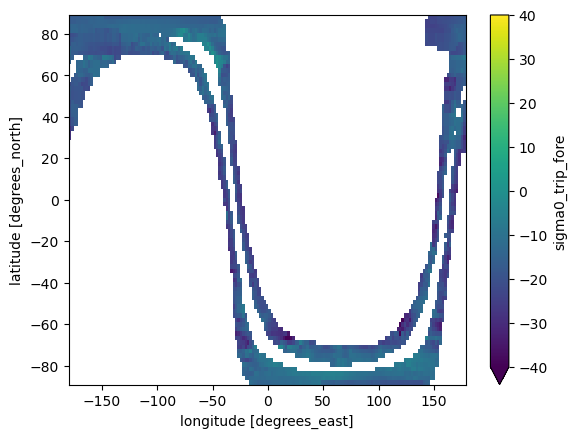

In [265]:
data_ascat['sigma0_trip_fore'].plot(vmax=40, vmin=-40)

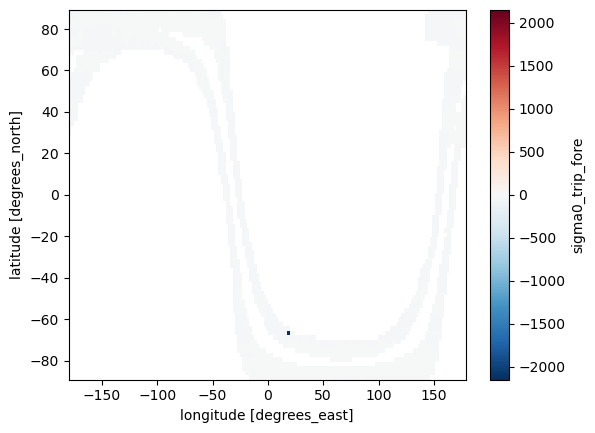

In [266]:
data_ascat['sigma0_trip_fore'].plot()

In [184]:
data_ascat['sigma0_trip_fore']

<xarray.DataArray 'sigma0_trip_fore' (lat: 83, lon: 167)>
array([[-17.862997, -17.147772, -16.98306 , ..., -18.86116 , -18.35382 ,
        -18.23648 ],
       [-16.961077, -17.138975, -16.961472, ..., -18.400003, -18.232262,
        -17.170128],
       [-14.383321, -14.138612, -13.769433, ..., -16.348038, -15.439281,
        -15.797288],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 88.1 85.96 83.81 81.66 ... -83.68 -85.83 -87.98
  * lon      (lon) float64 -178.9 -176.7 -174.6 -172.4 ... 173.3 175.4 177.6
Attributes:
    long_name:     sigma0_trip_fore
    grid_mapping:  crs
    short_name:    sigma0_trip_fore
    comment:       sigma0_trip_fore

In [268]:
data_ascat['sigma0_trip_fore'].min()

<xarray.DataArray 'sigma0_trip_fore' ()>
array(-2147.48364258)

In [269]:
data_ascat['sigma0_trip_fore'].max()

<xarray.DataArray 'sigma0_trip_fore' ()>
array(0.82719302)

## Example #3 Irminger_6

In [270]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20200121T203900Z_20200121T221758Z_epct_6d46d573_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)
data_ascat.lat

<xarray.DataArray 'lat' (lat: 368)>
array([ 89.428899,  88.941295,  88.453691, ..., -88.546419, -89.034022,
       -89.521626])
Coordinates:
  * lat      (lat) float64 89.43 88.94 88.45 87.97 ... -88.55 -89.03 -89.52
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [271]:
(data_ascat.lat[40] - data_ascat.lat[41])*111

<xarray.DataArray 'lat' ()>
array(54.12400062)

In [272]:
data_ascat.lat

<xarray.DataArray 'lat' (lat: 368)>
array([ 89.428899,  88.941295,  88.453691, ..., -88.546419, -89.034022,
       -89.521626])
Coordinates:
  * lat      (lat) float64 89.43 88.94 88.45 87.97 ... -88.55 -89.03 -89.52
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [273]:
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 368, lon: 738)
Coordinates:
  * lat                  (lat) float64 89.43 88.94 88.45 ... -89.03 -89.52
  * lon                  (lon) float64 -179.7 -179.2 -178.8 ... 179.1 179.6
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20200121T203900Z
    stop_sensing_time:         20200121T221758.125000Z
    EPCT_geospatial_lat_max:   89.1851
    EPCT_geospatial_lat_min:   71.4218
    EPCT_geospatial_lon_max:   258.4600
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [274]:
data_ascat['sigma0_trip_fore'].shape

(368, 738)

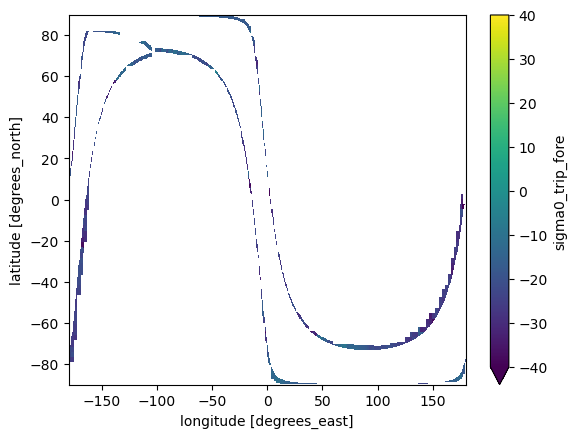

In [275]:
data_ascat['sigma0_trip_fore'].plot(vmax=40, vmin=-40)

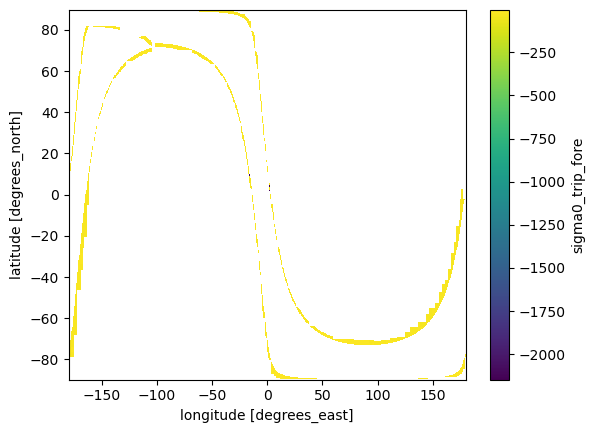

In [276]:
data_ascat['sigma0_trip_fore'].plot()

In [277]:
data_ascat['sigma0_trip_fore'].min()

<xarray.DataArray 'sigma0_trip_fore' ()>
array(-2147.48364258)

In [278]:
data_ascat['sigma0_trip_fore'].max()

<xarray.DataArray 'sigma0_trip_fore' ()>
array(-4.67313194)

## Example #4-2147.48364258 Irminger_6

In [253]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20191008T220000Z_20191008T234458Z_epct_a7ee646d_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)
data_ascat.lat

<xarray.DataArray 'lat' (lat: 83)>
array([ 88.146358,  86.002848,  83.859339,  81.71583 ,  79.57232 ,  77.428811,
        75.285302,  73.141792,  70.998283,  68.854774,  66.711264,  64.567755,
        62.424246,  60.280736,  58.137227,  55.993718,  53.850208,  51.706699,
        49.56319 ,  47.41968 ,  45.276171,  43.132662,  40.989152,  38.845643,
        36.702134,  34.558624,  32.415115,  30.271606,  28.128096,  25.984587,
        23.841078,  21.697568,  19.554059,  17.41055 ,  15.26704 ,  13.123531,
        10.980022,   8.836512,   6.693003,   4.549494,   2.405984,   0.262475,
        -1.881034,  -4.024544,  -6.168053,  -8.311562, -10.455072, -12.598581,
       -14.74209 , -16.8856  , -19.029109, -21.172618, -23.316128, -25.459637,
       -27.603146, -29.746656, -31.890165, -34.033674, -36.177184, -38.320693,
       -40.464202, -42.607712, -44.751221, -46.89473 , -49.03824 , -51.181749,
       -53.325258, -55.468768, -57.612277, -59.755786, -61.899296, -64.042805,
       -66.186314, -68.329824, -70.473333, -72.616842, -74.760352, -76.903861,
       -79.04737 , -81.19088 , -83.334389, -85.477898, -87.621408])
Coordinates:
  * lat      (lat) float64 88.15 86.0 83.86 81.72 ... -83.33 -85.48 -87.62
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [254]:
(data_ascat.lat[40] - data_ascat.lat[41])*111

<xarray.DataArray 'lat' ()>
array(237.92953575)

In [255]:
data_ascat.lat

<xarray.DataArray 'lat' (lat: 83)>
array([ 88.146358,  86.002848,  83.859339,  81.71583 ,  79.57232 ,  77.428811,
        75.285302,  73.141792,  70.998283,  68.854774,  66.711264,  64.567755,
        62.424246,  60.280736,  58.137227,  55.993718,  53.850208,  51.706699,
        49.56319 ,  47.41968 ,  45.276171,  43.132662,  40.989152,  38.845643,
        36.702134,  34.558624,  32.415115,  30.271606,  28.128096,  25.984587,
        23.841078,  21.697568,  19.554059,  17.41055 ,  15.26704 ,  13.123531,
        10.980022,   8.836512,   6.693003,   4.549494,   2.405984,   0.262475,
        -1.881034,  -4.024544,  -6.168053,  -8.311562, -10.455072, -12.598581,
       -14.74209 , -16.8856  , -19.029109, -21.172618, -23.316128, -25.459637,
       -27.603146, -29.746656, -31.890165, -34.033674, -36.177184, -38.320693,
       -40.464202, -42.607712, -44.751221, -46.89473 , -49.03824 , -51.181749,
       -53.325258, -55.468768, -57.612277, -59.755786, -61.899296, -64.042805,
       -66.186314, -68.329824, -70.473333, -72.616842, -74.760352, -76.903861,
       -79.04737 , -81.19088 , -83.334389, -85.477898, -87.621408])
Coordinates:
  * lat      (lat) float64 88.15 86.0 83.86 81.72 ... -83.33 -85.48 -87.62
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [256]:
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 83, lon: 168)
Coordinates:
  * lat                  (lat) float64 88.15 86.0 83.86 ... -83.33 -85.48 -87.62
  * lon                  (lon) float64 -178.9 -176.7 -174.6 ... 176.9 179.1
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20191008T220000Z
    stop_sensing_time:         20191008T234458.125000Z
    EPCT_geospatial_lat_max:   89.2169
    EPCT_geospatial_lat_min:   69.1425
    EPCT_geospatial_lon_max:   272.4475
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [257]:
data_ascat['sigma0_trip_fore'].shape

(83, 168)

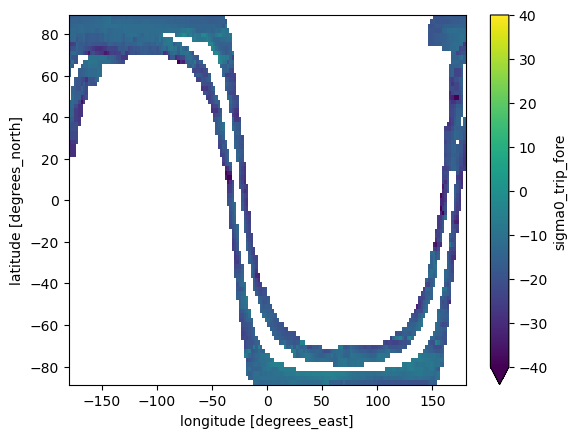

In [258]:
data_ascat['sigma0_trip_fore'].plot(vmax=40, vmin=-40)

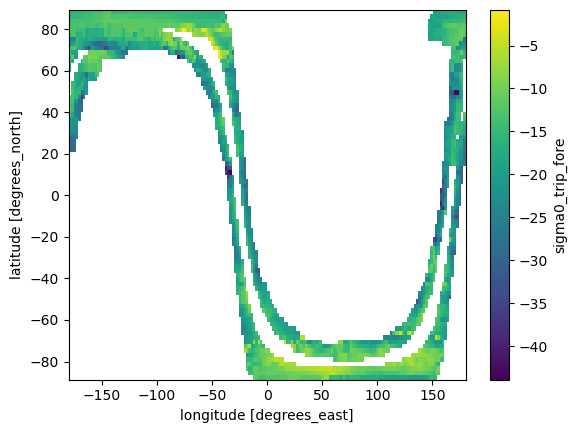

In [259]:
data_ascat['sigma0_trip_fore'].plot()

## Example #5 Irminger_6

In [290]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20200120T210000Z_20200120T224158Z_epct_6217d633_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)
data_ascat.lat

<xarray.DataArray 'lat' (lat: 354)>
array([ 88.919663,  88.417127,  87.914591, ..., -87.47042 , -87.972956,
       -88.475492])
Coordinates:
  * lat      (lat) float64 88.92 88.42 87.91 87.41 ... -87.47 -87.97 -88.48
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [291]:
(data_ascat.lat[40] - data_ascat.lat[41])*111

<xarray.DataArray 'lat' ()>
array(55.78147935)

In [292]:
data_ascat.lat

<xarray.DataArray 'lat' (lat: 354)>
array([ 88.919663,  88.417127,  87.914591, ..., -87.47042 , -87.972956,
       -88.475492])
Coordinates:
  * lat      (lat) float64 88.92 88.42 87.91 87.41 ... -87.47 -87.97 -88.48
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [293]:
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 354, lon: 717)
Coordinates:
  * lat                  (lat) float64 88.92 88.42 87.91 ... -87.97 -88.48
  * lon                  (lon) float64 -179.7 -179.2 -178.7 ... 179.6 180.1
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20200120T210000Z
    stop_sensing_time:         20200120T224158.125000Z
    EPCT_geospatial_lat_max:   82.3053
    EPCT_geospatial_lat_min:   70.6293
    EPCT_geospatial_lon_max:   252.1336
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [294]:
data_ascat['sigma0_trip_fore'].shape

(354, 717)

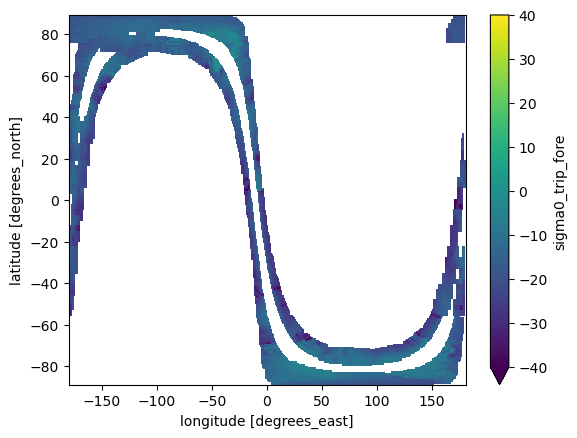

In [295]:
data_ascat['sigma0_trip_fore'].plot(vmax=40, vmin=-40)

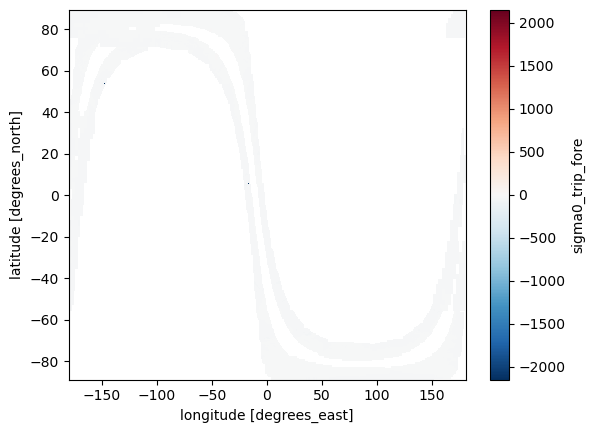

In [296]:
data_ascat['sigma0_trip_fore'].plot()

In [297]:
data_ascat['sigma0_trip_fore'].min()

<xarray.DataArray 'sigma0_trip_fore' ()>
array(-2147.48364258)

In [298]:
data_ascat['sigma0_trip_fore'].max()

<xarray.DataArray 'sigma0_trip_fore' ()>
array(1.237077)

In [27]:
data_dir_era5 = '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/era5_buoys/'
file = 'era_u10m_Irminger_6.nc'
era5 = xr.open_dataset(data_dir_era5 + file)
era5['u10'].sel(
        {
        #'time':'2020-01-22 00:02:58', 
        'latitude':slice(data_ascat.lat.min(), data_ascat.lat.max()), 
        'longitude':slice(data_ascat.lon.min(), data_ascat.lon.max())
        }#*,
        #method='nearest'
        )

<xarray.DataArray 'u10' (time: 78912, latitude: 0, longitude: 5)>
array([], shape=(78912, 0, 5), dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -39.97 -39.72 -39.47 -39.22 -38.97
  * latitude   (latitude) float32 
  * time       (time) datetime64[ns] 2012-01-01 ... 2020-12-31T23:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

ASCA_SZR_1B_M02_20171031235100Z_20171101013258Z_N_O_20171101013229Z

# Example sent to EUMETSAT

In [10]:
ascat_fn = ascat_dict['Pioneer_8']['nc_files']['ASCA_SZR_1B_M02_20171031235100Z_20171101013258Z_N_O_20171101013229Z']
ascat_fn

'ASCATL1SZR_20171031T235100Z_20171101T013258Z_epct_bdee10d6_P.nc'

In [11]:
data_ascat = xr.open_dataset(data_dir + ascat_fn)
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 75, lon: 150)
Coordinates:
  * lat                  (lat) float64 88.06 85.67 83.28 ... -83.73 -86.11 -88.5
  * lon                  (lon) float64 -178.8 -176.4 -174.0 ... 174.3 176.7
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20171031T235100Z
    stop_sensing_time:         20171101T013258.125000Z
    EPCT_geospatial_lat_max:   79.1824
    EPCT_geospatial_lat_min:   68.8408
    EPCT_geospatial_lon_max:   199.7849
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [12]:
data_ascat.lat

<xarray.DataArray 'lat' (lat: 75)>
array([ 88.055269,  85.669408,  83.283546,  80.897685,  78.511824,  76.125963,
        73.740102,  71.35424 ,  68.968379,  66.582518,  64.196657,  61.810796,
        59.424934,  57.039073,  54.653212,  52.267351,  49.88149 ,  47.495628,
        45.109767,  42.723906,  40.338045,  37.952183,  35.566322,  33.180461,
        30.7946  ,  28.408739,  26.022877,  23.637016,  21.251155,  18.865294,
        16.479433,  14.093571,  11.70771 ,   9.321849,   6.935988,   4.550127,
         2.164265,  -0.221596,  -2.607457,  -4.993318,  -7.379179,  -9.765041,
       -12.150902, -14.536763, -16.922624, -19.308486, -21.694347, -24.080208,
       -26.466069, -28.85193 , -31.237792, -33.623653, -36.009514, -38.395375,
       -40.781236, -43.167098, -45.552959, -47.93882 , -50.324681, -52.710542,
       -55.096404, -57.482265, -59.868126, -62.253987, -64.639848, -67.02571 ,
       -69.411571, -71.797432, -74.183293, -76.569155, -78.955016, -81.340877,
       -83.726738, -86.112599, -88.498461])
Coordinates:
  * lat      (lat) float64 88.06 85.67 83.28 80.9 ... -81.34 -83.73 -86.11 -88.5
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [13]:
data_ascat.lon

<xarray.DataArray 'lon' (lon: 150)>
array([-1.787613e+02, -1.763754e+02, -1.739896e+02, -1.716037e+02,
       -1.692179e+02, -1.668320e+02, -1.644461e+02, -1.620603e+02,
       -1.596744e+02, -1.572886e+02, -1.549027e+02, -1.525168e+02,
       -1.501310e+02, -1.477451e+02, -1.453593e+02, -1.429734e+02,
       -1.405875e+02, -1.382017e+02, -1.358158e+02, -1.334299e+02,
       -1.310441e+02, -1.286582e+02, -1.262724e+02, -1.238865e+02,
       -1.215006e+02, -1.191148e+02, -1.167289e+02, -1.143431e+02,
       -1.119572e+02, -1.095713e+02, -1.071855e+02, -1.047996e+02,
       -1.024137e+02, -1.000279e+02, -9.764203e+01, -9.525617e+01,
       -9.287030e+01, -9.048444e+01, -8.809858e+01, -8.571272e+01,
       -8.332686e+01, -8.094100e+01, -7.855514e+01, -7.616928e+01,
       -7.378342e+01, -7.139755e+01, -6.901169e+01, -6.662583e+01,
       -6.423997e+01, -6.185411e+01, -5.946825e+01, -5.708239e+01,
       -5.469653e+01, -5.231066e+01, -4.992480e+01, -4.753894e+01,
       -4.515308e+01, -4.276722e+01, -4.038136e+01, -3.799550e+01,
       -3.560964e+01, -3.322377e+01, -3.083791e+01, -2.845205e+01,
       -2.606619e+01, -2.368033e+01, -2.129447e+01, -1.890861e+01,
       -1.652275e+01, -1.413688e+01, -1.175102e+01, -9.365163e+00,
       -6.979301e+00, -4.593440e+00, -2.207579e+00,  1.782823e-01,
        2.564144e+00,  4.950005e+00,  7.335866e+00,  9.721727e+00,
        1.210759e+01,  1.449345e+01,  1.687931e+01,  1.926517e+01,
        2.165103e+01,  2.403689e+01,  2.642276e+01,  2.880862e+01,
        3.119448e+01,  3.358034e+01,  3.596620e+01,  3.835206e+01,
        4.073792e+01,  4.312378e+01,  4.550965e+01,  4.789551e+01,
        5.028137e+01,  5.266723e+01,  5.505309e+01,  5.743895e+01,
        5.982481e+01,  6.221067e+01,  6.459653e+01,  6.698240e+01,
        6.936826e+01,  7.175412e+01,  7.413998e+01,  7.652584e+01,
        7.891170e+01,  8.129756e+01,  8.368342e+01,  8.606929e+01,
        8.845515e+01,  9.084101e+01,  9.322687e+01,  9.561273e+01,
        9.799859e+01,  1.003845e+02,  1.027703e+02,  1.051562e+02,
        1.075420e+02,  1.099279e+02,  1.123138e+02,  1.146996e+02,
        1.170855e+02,  1.194713e+02,  1.218572e+02,  1.242431e+02,
        1.266289e+02,  1.290148e+02,  1.314006e+02,  1.337865e+02,
        1.361724e+02,  1.385582e+02,  1.409441e+02,  1.433300e+02,
        1.457158e+02,  1.481017e+02,  1.504875e+02,  1.528734e+02,
        1.552593e+02,  1.576451e+02,  1.600310e+02,  1.624168e+02,
        1.648027e+02,  1.671886e+02,  1.695744e+02,  1.719603e+02,
        1.743462e+02,  1.767320e+02])
Coordinates:
  * lon      (lon) float64 -178.8 -176.4 -174.0 -171.6 ... 172.0 174.3 176.7
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east

In [14]:
data_ascat['sigma0_trip_fore'].shape

(75, 150)

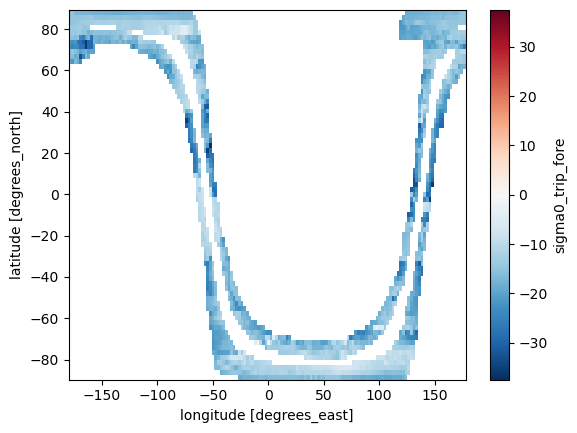

In [15]:
data_ascat['sigma0_trip_fore'].plot()

In [16]:
data_ascat.crs

<xarray.DataArray 'crs' ()>
array(b'', dtype='|S1')
Attributes:
    grid_mapping_name:            latitude_longitude
    long_name:                    CRS definition
    longitude_of_prime_meridian:  0.0
    semi_major_axis:              6378137.0
    inverse_flattening:           298.257223563
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -179.9542388916016 2.385861208150222 0 89.2...

# List of examples Pioneer

In [ ]:
ascat_dict['Pioneer_8']['nc_files']

In [18]:
len(ascat_dict['Pioneer_8']['nc_files'])

325

In [25]:
dict_low_res = {}
dict_expected_res = {}
count_low = 0
count_high = 0
for key, ascat_fn in ascat_dict['Pioneer_8']['nc_files'].items():
    data_ascat = xr.open_dataset(data_dir + ascat_fn)
    if data_ascat.lat[0] - data_ascat.lat[1] > 2:
        dict_low_res[key] = ascat_fn
        print(ascat_fn)
        count_low = count_low + 1
    else:
        dict_expected_res[key] = ascat_fn
        #print(ascat_fn)
        count_high = count_high + 1
print(count_low)
print(count_high)

ASCATL1SZR_20180328T234200Z_20180329T012358Z_epct_37fd0cf9_P.nc
ASCATL1SZR_20180326T004500Z_20180326T022958Z_epct_ab0bb9e7_P.nc
ASCATL1SZR_20180325T234800Z_20180326T012958Z_epct_b92f82e1_P.nc
ASCATL1SZR_20180324T003000Z_20180324T021158Z_epct_62afb7db_P.nc
ASCATL1SZR_20180323T234500Z_20180324T012958Z_epct_d27677a7_P.nc
ASCATL1SZR_20180323T005100Z_20180323T023258Z_epct_a568b6b0_P.nc
ASCATL1SZR_20180321T233000Z_20180322T011158Z_epct_8dcaf3ce_P.nc
ASCATL1SZR_20180320T235100Z_20180321T013258Z_epct_c8bb1fed_P.nc
ASCATL1SZR_20180319T003300Z_20180319T021458Z_epct_59c52172_P.nc
ASCATL1SZR_20180318T235100Z_20180319T013258Z_epct_16c15993_P.nc
ASCATL1SZR_20180318T005400Z_20180318T023558Z_epct_78d17f64_P.nc
ASCATL1SZR_20180316T233300Z_20180317T011458Z_epct_94ca8ee5_P.nc
ASCATL1SZR_20180316T005400Z_20180316T023558Z_epct_0b919266_P.nc
ASCATL1SZR_20180315T235400Z_20180316T013558Z_epct_21db0da4_P.nc
ASCATL1SZR_20180314T003600Z_20180314T022058Z_epct_e71084fa_P.nc
ASCATL1SZR_20180313T235400Z_20180314T013

In [26]:
with open('products_low_res_pioneer_8.pickle', 'wb') as handle:
    pickle.dump(dict_low_res, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('products_25_km_pioneer_8.pickle', 'wb') as handle:
    pickle.dump(dict_expected_res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
data = xr.open_dataset(data_dir + 'ASCATL1SZR_20171101T004500Z_20171101T022958Z_epct_de67f74a_P.nc')
data


<xarray.Dataset>
Dimensions:              (lat: 78, lon: 158)
Coordinates:
  * lat                  (lat) float64 88.05 85.78 83.51 ... -84.51 -86.78
  * lon                  (lon) float64 -178.6 -176.3 -174.0 ... 175.6 177.9
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20171101T004500Z
    stop_sensing_time:         20171101T022958.125000Z
    EPCT_geospatial_lat_max:   84.7100
    EPCT_geospatial_lat_min:   65.3865
    EPCT_geospatial_lon_max:   203.1436
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [27]:
dict_expected_res

{'ASCA_SZR_1B_M01_20180329145700Z_20180329163558Z_N_O_20180329160627Z': 'ASCATL1SZR_20180329T145700Z_20180329T163558Z_epct_4695022c_P.nc',
 'ASCA_SZR_1B_M02_20180329140000Z_20180329153858Z_N_O_20180329153840Z': 'ASCATL1SZR_20180329T140000Z_20180329T153858Z_epct_3e2792a6_P.nc',
 'ASCA_SZR_1B_M02_20180328004800Z_20180328022958Z_N_O_20180328022916Z': 'ASCATL1SZR_20180328T004800Z_20180328T022958Z_epct_e2f37719_P.nc',
 'ASCA_SZR_1B_M01_20180327135700Z_20180327153858Z_N_O_20180327150603Z': 'ASCATL1SZR_20180327T135700Z_20180327T153858Z_epct_24ff3439_P.nc',
 'ASCA_SZR_1B_M02_20180326150000Z_20180326164158Z_N_O_20180326163958Z': 'ASCATL1SZR_20180326T150000Z_20180326T164158Z_epct_b7d01466_P.nc',
 'ASCA_SZR_1B_M01_20180324150000Z_20180324163858Z_N_O_20180324160844Z': 'ASCATL1SZR_20180324T150000Z_20180324T163858Z_epct_6b7fd508_P.nc',
 'ASCA_SZR_1B_M02_20180324140300Z_20180324154158Z_N_O_20180324154203Z': 'ASCATL1SZR_20180324T140300Z_20180324T154158Z_epct_05bfb1a5_P.nc',
 'ASCA_SZR_1B_M02_201803221

In [28]:
data = xr.open_dataset(data_dir + 'ASCATL1SZR_20180329T145700Z_20180329T163558Z_epct_4695022c_P.nc')
data


<xarray.Dataset>
Dimensions:              (lat: 481, lon: 966)
Coordinates:
  * lat                  (lat) float64 89.05 88.68 88.3 ... -88.86 -89.23 -89.6
  * lon                  (lon) float64 -179.5 -179.2 -178.8 ... 179.2 179.6
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20180329T145700Z
    stop_sensing_time:         20180329T163558.125000Z
    EPCT_geospatial_lat_max:   83.2728
    EPCT_geospatial_lat_min:   67.4356
    EPCT_geospatial_lon_max:   324.7726
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [29]:
data = xr.open_dataset(data_dir + 'ASCATL1SZR_20180316T150900Z_20180316T164758Z_epct_04dc23f6_P.nc')
data


<xarray.Dataset>
Dimensions:              (lat: 526, lon: 1058)
Coordinates:
  * lat                  (lat) float64 89.11 88.77 88.43 ... -88.82 -89.16 -89.5
  * lon                  (lon) float64 -179.8 -179.5 -179.1 ... 179.5 179.8
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20180316T150900Z
    stop_sensing_time:         20180316T164758.125000Z
    EPCT_geospatial_lat_max:   80.7760
    EPCT_geospatial_lat_min:   65.6399
    EPCT_geospatial_lon_max:   315.7484
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [30]:
dict_low_res = {}
dict_expected_res = {}
count_low = 0
count_high = 0
for key, ascat_fn in ascat_dict['Irminger_6']['nc_files'].items():
    data_ascat = xr.open_dataset(data_dir + ascat_fn)
    if data_ascat.lat[0] - data_ascat.lat[1] > 2:
        dict_low_res[key] = ascat_fn
        print(ascat_fn)
        count_low = count_low + 1
    else:
        dict_expected_res[key] = ascat_fn
        #print(ascat_fn)
        count_high = count_high + 1
print(count_low)
print(count_high)

ASCATL1SZR_20200121T221800Z_20200122T000258Z_epct_dde0d061_P.nc
ASCATL1SZR_20200121T214800Z_20200121T232958Z_epct_f73691bd_P.nc
ASCATL1SZR_20200120T224200Z_20200121T002358Z_epct_ecdb2691_P.nc
ASCATL1SZR_20200119T220300Z_20200119T234758Z_epct_e8dea66a_P.nc
ASCATL1SZR_20200118T222400Z_20200119T000858Z_epct_dd7cfae2_P.nc
ASCATL1SZR_20200117T220300Z_20200117T234458Z_epct_42e14e13_P.nc
ASCATL1SZR_20200117T213000Z_20200117T231158Z_epct_5ed3fa55_P.nc
ASCATL1SZR_20200116T222400Z_20200117T000558Z_epct_5f7650c6_P.nc
ASCATL1SZR_20200116T215100Z_20200116T233558Z_epct_3e5032d2_P.nc
ASCATL1SZR_20200114T220900Z_20200114T235058Z_epct_04cab6b8_P.nc
ASCATL1SZR_20200113T223000Z_20200114T001158Z_epct_e0560ea0_P.nc
ASCATL1SZR_20200112T220600Z_20200112T234758Z_epct_1226d215_P.nc
ASCATL1SZR_20200112T213600Z_20200112T231758Z_epct_f2502910_P.nc
ASCATL1SZR_20200111T222700Z_20200112T001158Z_epct_5d424335_P.nc
ASCATL1SZR_20200109T221200Z_20200109T235358Z_epct_b22fd63d_P.nc
ASCATL1SZR_20200108T223300Z_20200109T001

In [34]:
dict_low_res = {}
dict_expected_res = {}
count_low = 0
count_high = 0
for buoy in ascat_dict.keys():
    print(buoy)
    try:
        for key, ascat_fn in ascat_dict[buoy]['nc_files'].items():
            data_ascat = xr.open_dataset(data_dir + ascat_fn)
            if data_ascat.lat[0] - data_ascat.lat[1] > 2:
                dict_low_res[key] = ascat_fn
                print(ascat_fn)
                count_low = count_low + 1
            else:
                dict_expected_res[key] = ascat_fn
                #print(ascat_fn)
                count_high = count_high + 1
    except:
        print('No nc files found.')
print(count_low)
print(count_high)

Endurance_8
Irminger_7
ASCATL1SZR_20210731T223900Z_20210801T002058Z_epct_a7f7130a_P.nc
ASCATL1SZR_20210730T221200Z_20210730T235358Z_epct_59df1ee7_P.nc
ASCATL1SZR_20210729T223300Z_20210730T001458Z_epct_23cd6ff7_P.nc
ASCATL1SZR_20210728T220000Z_20210728T234158Z_epct_6d32148f_P.nc
ASCATL1SZR_20210728T204500Z_20210728T222658Z_epct_843db233_P.nc
ASCATL1SZR_20210727T222100Z_20210728T000558Z_epct_bb769942_P.nc
ASCATL1SZR_20210727T210600Z_20210727T224758Z_epct_9fe25fc7_P.nc
ASCATL1SZR_20210725T221500Z_20210725T235658Z_epct_b3a9e234_P.nc
ASCATL1SZR_20210724T223600Z_20210725T002058Z_epct_5086bb65_P.nc
ASCATL1SZR_20210723T220600Z_20210723T234758Z_epct_e10ee758_P.nc
ASCATL1SZR_20210723T204800Z_20210723T222958Z_epct_c113c5f8_P.nc
ASCATL1SZR_20210722T222700Z_20210723T000858Z_epct_80279c93_P.nc
ASCATL1SZR_20210722T210900Z_20210722T225358Z_epct_a9512a44_P.nc
ASCATL1SZR_20210720T222100Z_20210721T000258Z_epct_2eabb07c_P.nc
ASCATL1SZR_20210719T224200Z_20210720T002358Z_epct_66c80aa9_P.nc
ASCATL1SZR_202107

with open('products_low_res.pickle', 'wb') as handle:
    pickle.dump(dict_low_res, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('products_25_km', 'wb') as handle:
    pickle.dump(dict_expected_res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('products_low_res.pickle', 'rb') as handle:
    dict_low_res = pickle.load(handle)

In [3]:
len (dict_low_res)

1895

In [5]:
with open('products_25_km', 'rb') as handle:
    dict_expected_res = pickle.load(handle)

In [6]:
len(dict_expected_res)

6631

In [11]:
for buoy in ascat_dict.keys():
    print(buoy)
    try:
        print(len(ascat_dict[buoy]['nc_files']))
    except:
        print('No files')

Endurance_8
168
Irminger_7
1823
SPURS2
448
Endurance_4
266
Irminger_6
865
Pioneer_5
338
CLIMODE
No files
Endurance_9
114
Pioneer_10
353
SouthernOcean2
1086
Endurance_3
303
Pioneer_3
356
SPURS1
111
Endurance_7
363
Irminger_3
1403
Pioneer_7
318
Pioneer_6
528
Pioneer_8
325


In [5]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
fname = 'ASCATL1SZR_20210727T222100Z_20210728T000558Z_epct_bb769942_P.nc'

In [6]:
data_ascat = xr.open_dataset(data_dir + fname)
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 83, lon: 167)
Coordinates:
  * lat                  (lat) float64 88.14 85.99 83.84 ... -86.01 -88.16
  * lon                  (lon) float64 -178.9 -176.7 -174.6 ... 175.9 178.0
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20210727T222100Z
    stop_sensing_time:         20210728T000558.125000Z
    EPCT_geospatial_lat_max:   89.1712
    EPCT_geospatial_lat_min:   68.8765
    EPCT_geospatial_lon_max:   256.4701
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [7]:
def check_if_low_resolution(data_ascat):
    if data_ascat.lat[0] - data_ascat.lat[1] > 2:
        f_low_res = 1
    else:
        f_low_res = 0
    return f_low_res

In [8]:
check_if_low_resolution(data_ascat)

1